# Mercedes-Benz Greener Manufacturing

####  This dataset contains an anonymized set of variables that describe different Mercedes cars. The ground truth is labeled 'y' and represents the time (in seconds) that the car took to pass testing.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing

In [179]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [170]:
train.head(5)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'BOXPLOT of Target')

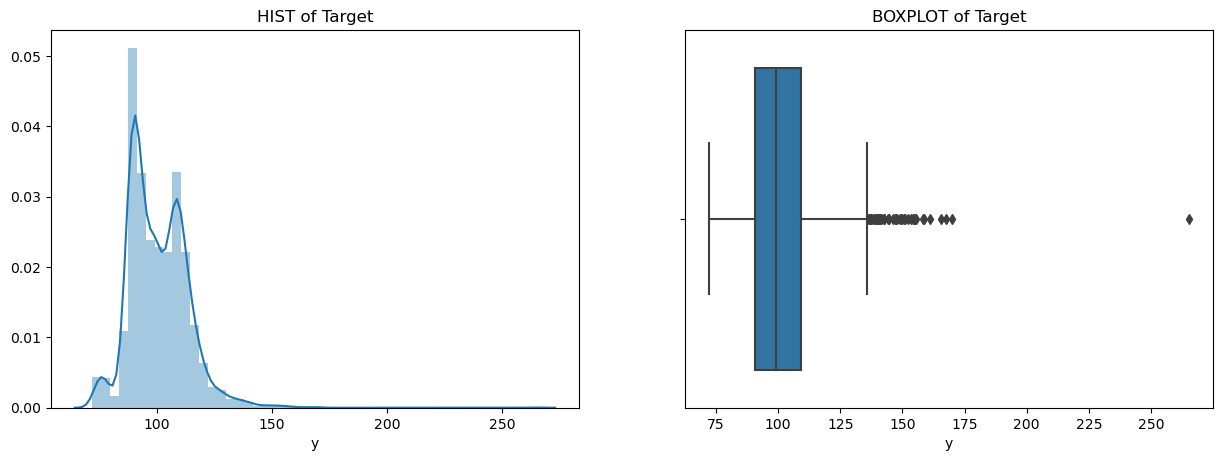

In [171]:
fig, axes=plt.subplots(1,2,figsize=(15,5),dpi=100)
sns.distplot(train.y,bins=50, ax=axes[0])
sns.boxplot(train.y, ax=axes[1])
axes[0].set_title('HIST of Target')    
axes[1].set_title('BOXPLOT of Target')    


In [172]:
train.y.describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

In [173]:
train=train[train.y<140]

### Missing values

In [174]:
train.isna().any().sum()

0

### Type of values 

In [175]:
train.dtypes.value_counts()

int64      369
object       8
float64      1
dtype: int64

In [180]:
cat_columns=train.columns[train.dtypes=='object'].values
cat_columns

array(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype=object)

In [177]:
for obj in cat_columns:
    print(obj, np.unique(train[obj]))

X0 ['a' 'aa' 'ab' 'ac' 'ad' 'af' 'ai' 'aj' 'ak' 'al' 'am' 'ao' 'ap' 'aq' 'as'
 'at' 'au' 'aw' 'ax' 'ay' 'az' 'b' 'ba' 'bc' 'c' 'd' 'e' 'f' 'g' 'h' 'i'
 'j' 'k' 'l' 'm' 'n' 'o' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']
X1 ['a' 'aa' 'ab' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p'
 'q' 'r' 's' 't' 'u' 'v' 'w' 'y' 'z']
X2 ['a' 'ac' 'ae' 'af' 'ag' 'ah' 'ai' 'ak' 'al' 'am' 'an' 'ao' 'ap' 'aq' 'ar'
 'as' 'at' 'au' 'av' 'aw' 'ay' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l'
 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'x' 'y' 'z']
X3 ['a' 'b' 'c' 'd' 'e' 'f' 'g']
X4 ['a' 'b' 'c' 'd']
X5 ['aa' 'ab' 'ac' 'ad' 'ae' 'af' 'ag' 'ah' 'c' 'd' 'f' 'g' 'h' 'i' 'j' 'k'
 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 'u' 'v' 'w' 'x' 'y']
X6 ['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l']
X8 ['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y']


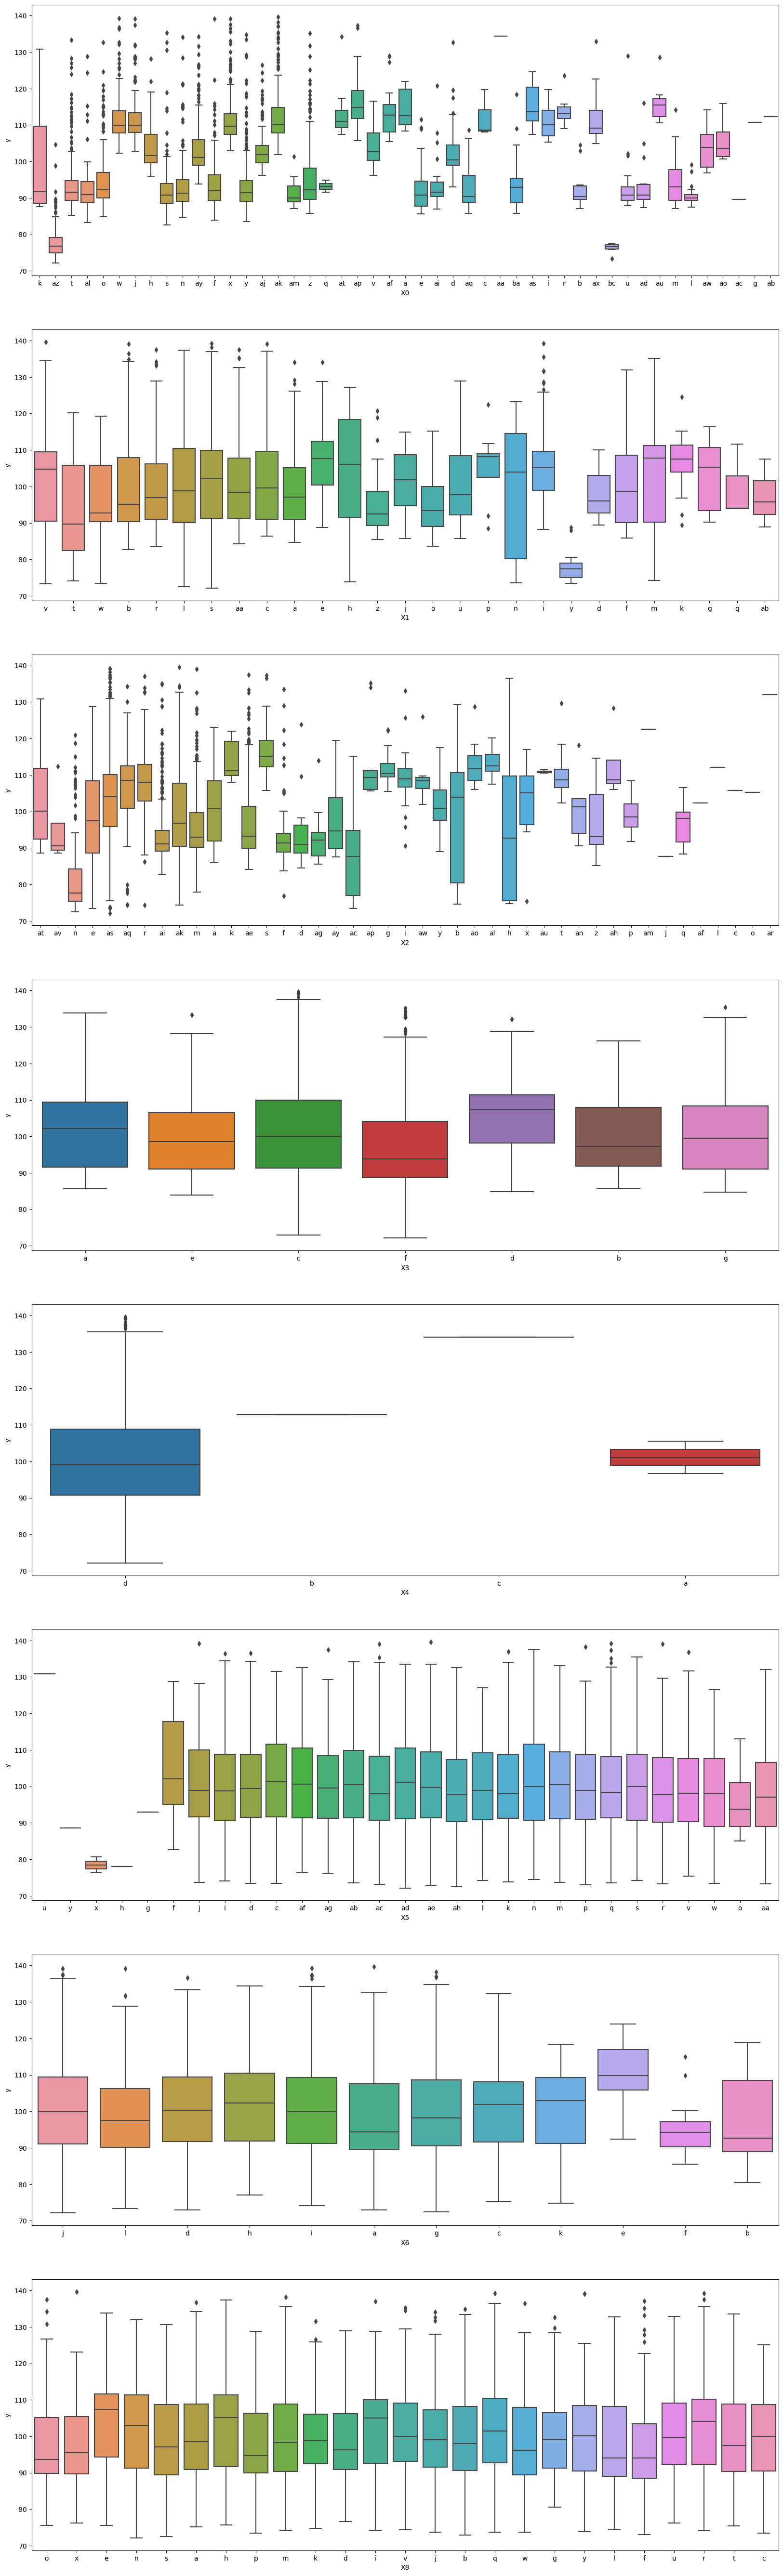

In [178]:
fig, axes=plt.subplots(len(cat_columns),figsize=(20,70),dpi=100)
for i,cat in enumerate(cat_columns):
    sns.boxplot(x=cat, y='y',data=train,ax=axes[i])


In [137]:
num_columns=train.columns[train.dtypes=='int64'].values[1:]
num_columns

array(['X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28',
       'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37',
       'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46',
       'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55',
       'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64',
       'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74',
       'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83',
       'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92',
       'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101',
       'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109',
       'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117',
       'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126',
       'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134',
       'X135',

In [138]:
train[num_columns].describe()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4174.000000,4174.0,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,...,4174.000000,4174.00000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000
mean,0.013416,0.0,0.074748,0.057738,0.428126,0.000479,0.002635,0.007667,0.007667,0.100144,...,0.319118,0.05678,0.314327,0.020843,0.009344,0.008146,0.007667,0.001198,0.000479,0.001437
std,0.115063,0.0,0.263017,0.233276,0.494867,0.021887,0.051274,0.087233,0.087233,0.300228,...,0.466191,0.23145,0.464303,0.142877,0.096221,0.089896,0.087233,0.034594,0.021887,0.037891
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [139]:
var_null=[]
for num in num_columns:
    if train[num].var()==0:
        var_null.append(num)
        print(num)

X11
X93
X107
X233
X235
X268
X289
X290
X293
X297
X330
X339
X347


In [140]:
train=train.drop(var_null,axis=1)
test=test.drop(var_null,axis=1)

### Correlation 

In [141]:
num_columns=train.columns[train.dtypes=='int64'].values[1:]
corr_main_num=[]
for num in num_columns:
    if np.abs(train[num].corr(train.y))>0.25:
        corr_main_num.append(num)
print('Important Features with there respective correlations : {}'.format(corr_main_num))

Important Features with there respective correlations : ['X28', 'X29', 'X51', 'X54', 'X76', 'X80', 'X118', 'X119', 'X127', 'X136', 'X162', 'X166', 'X178', 'X185', 'X232', 'X234', 'X250', 'X261', 'X263', 'X272', 'X275', 'X276', 'X279', 'X313', 'X314', 'X316', 'X328', 'X348', 'X378']


In [142]:
corr_n=train[num_columns].corr()
corr_n.loc[:,:] =  np.tril(corr_n, k=-1) 

In [143]:
corr_n

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
X10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
X12,-0.033145,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
X13,-0.028867,0.214757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
X14,-0.100899,-0.245928,-0.085480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
X15,-0.002553,-0.006223,-0.005420,-0.018944,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X380,-0.010568,-0.005488,0.023276,0.007777,-0.001984,-0.004658,-0.007965,-0.007965,-0.021353,-0.006512,...,-0.062041,-0.022235,-0.061358,-0.013222,-0.008801,0.000000,0.000000,0.000000,0.000000,0.0
X382,-0.010250,-0.024983,-0.021758,0.012767,-0.001924,-0.004518,1.000000,0.086749,-0.029322,-0.028022,...,-0.060174,-0.021566,-0.059512,-0.012824,-0.008536,-0.007965,0.000000,0.000000,0.000000,0.0
X383,-0.004038,-0.009843,-0.008573,0.026027,-0.000758,-0.001780,-0.003044,-0.003044,-0.011553,0.005663,...,-0.008850,-0.008497,0.021310,-0.005053,-0.003363,-0.003138,-0.003044,0.000000,0.000000,0.0
X384,-0.002553,-0.006223,0.041515,0.025305,-0.000479,-0.001125,-0.001924,-0.001924,-0.007304,-0.008936,...,-0.014989,-0.005372,0.008757,-0.003194,-0.002126,-0.001984,-0.001924,-0.000758,0.000000,0.0


In [144]:
set_corr=set ()
result=[]
for i in corr_n:
    list_corr=(corr_n[i][corr_n[i]==1].index.to_list())
    if  list_corr and i not in set_corr:
        set_corr.update(set(list_corr))
        list_corr.append(i)
        result.append(list_corr)
          
          


In [145]:
result

[['X382', 'X17'],
 ['X232', 'X279', 'X29'],
 ['X35', 'X37', 'X31'],
 ['X39', 'X33'],
 ['X302', 'X44'],
 ['X113', 'X134', 'X147', 'X222', 'X48'],
 ['X102', 'X214', 'X239', 'X53'],
 ['X76', 'X54'],
 ['X324', 'X58'],
 ['X248', 'X253', 'X385', 'X60'],
 ['X172', 'X216', 'X62'],
 ['X213', 'X67'],
 ['X84', 'X244', 'X71'],
 ['X122', 'X243', 'X320', 'X88'],
 ['X245', 'X89'],
 ['X94', 'X242', 'X90'],
 ['X199', 'X112'],
 ['X119', 'X118'],
 ['X227', 'X125'],
 ['X146', 'X138'],
 ['X226', 'X326', 'X152'],
 ['X360', 'X155'],
 ['X262', 'X266', 'X184'],
 ['X247', 'X202'],
 ['X254', 'X230'],
 ['X364', 'X365', 'X240'],
 ['X296', 'X295'],
 ['X299', 'X298']]

In [146]:
train=train.T.drop_duplicates().T

In [147]:
test.columns

Index(['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=364)

In [148]:
test=test[test.columns[test.columns.isin(train.columns)]]

In [181]:
le=preprocessing.LabelEncoder()

In [182]:
for i in cat_columns:
    le.fit (  list(train[i].values)+list(test[i].values)  )
    train[i]=le.transform(list(train[i].values))
    test[i]=le.transform(list(test[i].values))


In [151]:
cat_corr=train[train.columns[1:10]].corr()
obj = np.array(cat_corr)
obj[np.tril_indices_from(obj)] = False

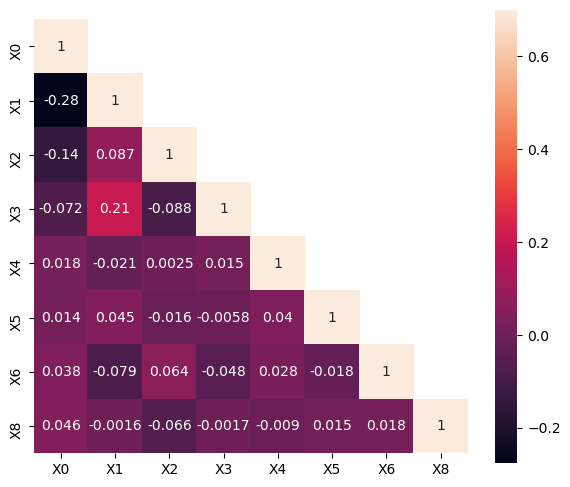

In [152]:
plt.figure(figsize=(7,6),dpi=100)
sns.heatmap(cat_corr,mask=obj,vmax=.7, square=True,annot=True)

In [153]:
train.ID

0          0
1          6
2          7
3          9
4         13
        ... 
4204    8405
4205    8406
4206    8412
4207    8415
4208    8417
Name: ID, Length: 4174, dtype: object

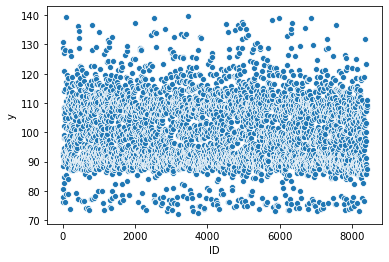

In [154]:
sns.scatterplot(x=train.ID,y=train.y)

##   Importance features

In [53]:
import xgboost as xgb
import catboost as cb

In [155]:
def xgb_r2_score(preds, final):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

In [156]:
train['y']=train['y'].astype("float")

In [157]:
train[train.columns[train.dtypes=='object']]=train.select_dtypes(include='object').astype('int64')

In [158]:
train.dtypes.value_counts()

int64      319
float64      1
dtype: int64

[12:32:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[12:32:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators, seed=1301, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:32:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


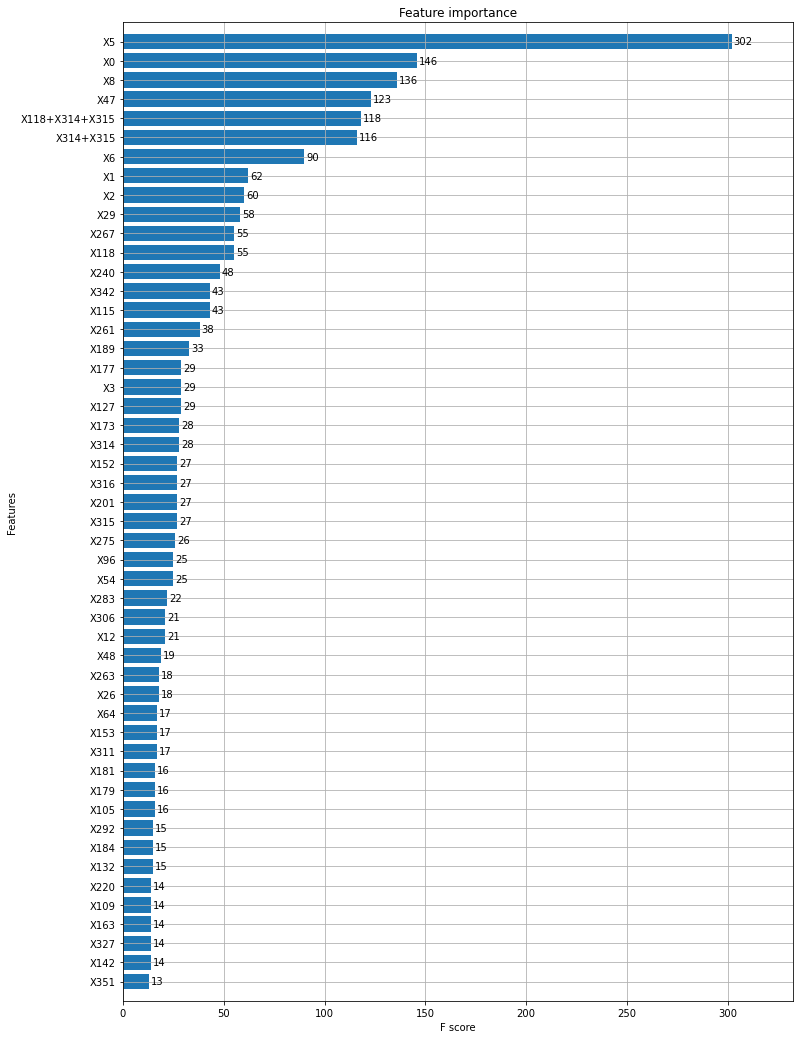

In [163]:
train_y = train['y'].values
train_X = train.drop(["ID", "y"], axis=1)

xgb_params = {
    'n_estimators': 450,
    'eta': 0.015511430594156186,
    'max_depth': 3,
    'subsample': 0.7030868864719267,
    'colsample_bytree': 0.5156885116285503,
    'objective': 'reg:linear',
    'silent': 1,
    'eval_metric': 'rmse',
    'base_score': np.mean(train_y), # base prediction = mean(target)
    'min_child_weight':2,
    'seed=1301':1301
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
dtest = xgb.DMatrix(test.drop("ID",axis=1))
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=450, feval=xgb_r2_score, maximize=True)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [164]:
from sklearn.metrics import r2_score
print(r2_score(model.predict(dtrain), dtrain.get_label()))

0.48347348884731944


In [65]:
predict=model.predict(dtest)
(pd.DataFrame({"id":test.ID, 'y':predict})).to_csv('result.csv',index=False)

In private leaderboard score is 0.50983.

## RandomizedSearchCV for finding best parameters 

In [82]:
train_y = train['y'].values
train_X = train.drop(["ID", "y"], axis=1)

In [84]:
from scipy import stats
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import f1_score

numFolds = 5
folds = KFold(n_splits = numFolds, shuffle = True)

clf_xgb = XGBRegressor ()
param_dist = {'n_estimators': stats.randint(100, 500),
              'learning_rate': stats.uniform(0.01, 0.07),
              'subsample': stats.uniform(0.3, 0.7),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.75, 0.45),
              'min_child_weight': [1, 2, 3]
             }
clf = RandomizedSearchCV(clf_xgb, param_distributions = param_dist, n_iter = 25, scoring = 'r2', error_score = 0,cv=folds, verbose = 3, n_jobs = -1)

clf.fit(train_X.values,train_y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 18.7min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                   error_score=0,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=...
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F5CC50E190>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001

In [247]:
clf.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5156885116285503, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.015511430594156186, max_delta_step=0, max_depth=3,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=410, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.7030868864719267, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [85]:
mod=clf.best_estimator_

In [86]:
mod.fit(train_X.values,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7698594303302904, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.019809984207528414, max_delta_step=0, max_depth=3,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.7901626711630314, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [87]:
pred=mod.predict(test.drop("ID",axis=1).values)

In [88]:
(pd.DataFrame({"id":test.ID, 'y':pred})).to_csv('result1.csv',index=False)

In [ ]:
After finding best parameters  In private leaderboard score is 0.55288.

## Features extraction 

In [ ]:
Suppose we have no outliers. And we will take best 50 features to train our model. 

In [ ]:
x_f=list(map(lambda x: x[0], sorted(model.get_fscore().items(),key=lambda x: x[1])[-50:]))

In [187]:
train['X314+X315']=train["X314"]+train["X315"]
train['X118+X314+X315']=train["X314"]+train["X315"]+train["X118"]
test['X314+X315']=test["X314"]+test["X315"]
test['X118+X314+X315']=test["X314"]+test["X315"]+test["X118"]


In [167]:

train_y = train['y'].values
train_X = train[x_f]


xgb_params = {
    'n_estimators': 450,
    'eta': 0.015511430594156186,
    'max_depth': 3,
    'subsample': 0.7030868864719267,
    'colsample_bytree': 0.5156885116285503,
    'objective': 'reg:linear',
    'silent': 1,
    'eval_metric': 'rmse',
    'base_score': np.mean(train_y), # base prediction = mean(target)
    'min_child_weight':2,
    'seed=1301':1301
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
dtest = xgb.DMatrix(test[x_f])
model = xgb.train(dict(xgb_params, silent=0),  dtrain, num_boost_round=450,feval=xgb_r2_score, maximize=True)




[12:33:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[12:33:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators, seed=1301, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:33:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [168]:
pred=model.predict(dtest)
(pd.DataFrame({"id":test.ID, 'y':pred})).to_csv('result4.csv',index=False)

In private leaderboard score is 0.55766. It is the best scores.

### PCA and ICA

In [225]:
from sklearn.decomposition import PCA, FastICA
from sklearn.decomposition import TruncatedSVD
n_comp = 12

In [226]:
# tSVD
tsvd = TruncatedSVD(n_components=n_comp, random_state=42)
tsvd_results_train = tsvd.fit_transform(train_X)
tsvd_results_test = tsvd.transform(test.drop('ID',axis=1))

# PCA
pca = PCA(n_components=n_comp, random_state=42)
pca2_results_train = pca.fit_transform(train_X)
pca2_results_test = pca.transform(test.drop('ID',axis=1))

# ICA
ica = FastICA(n_components=n_comp, random_state=42)
ica2_results_train = ica.fit_transform(train_X)
ica2_results_test = ica.transform(test.drop('ID',axis=1))

In [273]:
train_pca=train_X.copy()
test_pca=test.copy()

In [274]:
for i in range (1, n_comp+1):
    train_pca['pca_'+ str(i)]=pca2_results_train[:,i-1]
    test_pca['pca_'+ str(i)]=pca2_results_test[:,i-1]
    
    train_pca['ica_'+ str(i)]=ica2_results_train[:,i-1]
    test_pca['ica_'+ str(i)]=ica2_results_test[:,i-1]

[11:35:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[11:35:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:35:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


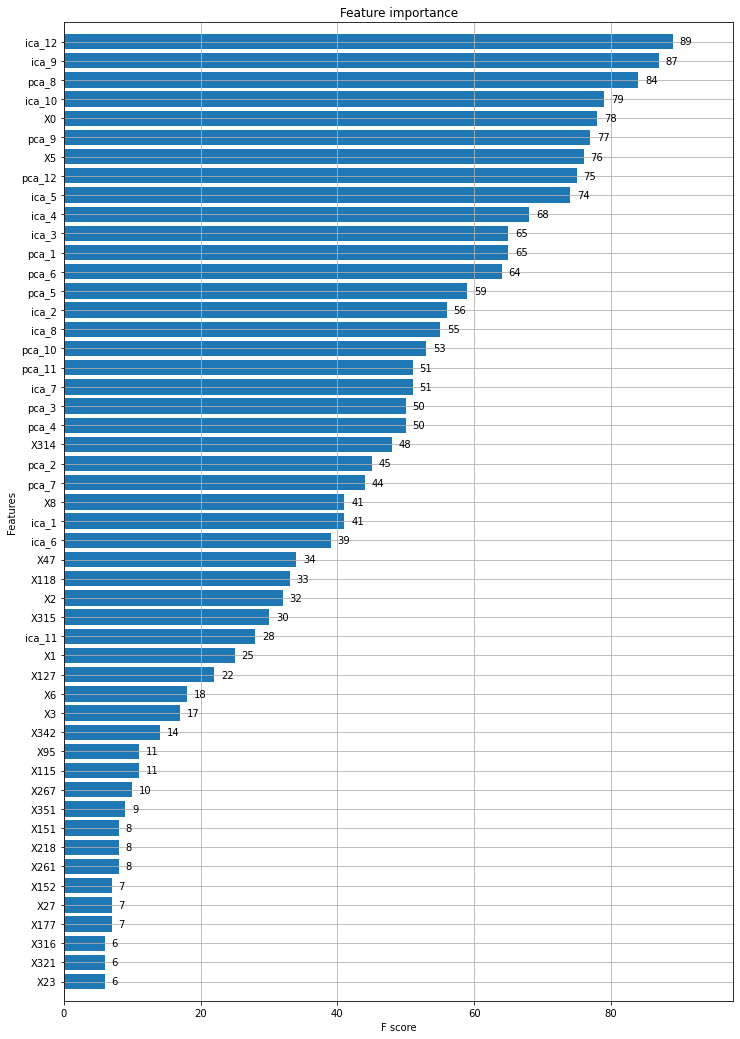

In [275]:
dtrain_pca = xgb.DMatrix(train_pca, train_y, feature_names=train_pca.columns.values)
dtest_pca = xgb.DMatrix(test_pca.drop("ID",axis=1))

model = xgb.train(dict(xgb_params, silent=0), dtrain_pca, num_boost_round=100, feval=xgb_r2_score, maximize=True)


# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [277]:
print(r2_score(model.predict(dtrain_pca), dtrain_pca.get_label()))

0.5629708039673771


In [276]:
predict=model.predict(dtest_pca)
(pd.DataFrame({"id":test.ID, 'y':predict})).to_csv('result2.csv',index=False)

In private leaderboard score is 0.54268. It became worst. Let's find best parametres. And remove

In [282]:
numFolds = 5
folds = KFold(n_splits = numFolds, shuffle = True)

clf_xgb = XGBRegressor ()
param_dist = {'n_estimators': stats.randint(100, 500),
              'learning_rate': stats.uniform(0.01, 0.07),
              'subsample': stats.uniform(0.3, 0.7),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.75, 0.45),
              'min_child_weight': [1, 2, 3]
             }
clf = RandomizedSearchCV(clf_xgb, param_distributions = param_dist, n_iter = 25, scoring = 'r2', error_score = 0,cv=folds, verbose = 3, n_jobs = -1)

clf.fit(train_pca.values,train_y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 11.7min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                   error_score=0,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=...
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F481419100>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001

In [62]:
clf.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8986506694517433, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.024325404382648977, max_delta_step=0, max_depth=8,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=224, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.8727587049484211, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [285]:
model_best=clf.best_estimator_
model_best.fit(train_pca.values,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8700283883429417, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.014799978993025147, max_delta_step=0, max_depth=5,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=410, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.4536600514142759, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [63]:
result=model_best.predict(test_pca.drop('ID',axis=1).values)
(pd.DataFrame({"id":test_pca.ID, 'y':result})).to_csv('result.csv',index=False)

NameError: name 'model_best' is not defined

In [297]:
x_f=list(map(lambda x: x[0], sorted(model.get_fscore().items(),key=lambda x: x[1])[-50:]))

In [296]:
model_best.fit(train_pca[x_f].values,train_y)
result=model_best.predict(test_pca[x_f].values)
(pd.DataFrame({"id":test_pca.ID, 'y':result})).to_csv('result.csv',index=False)

After include only 50 most  important features. Scores became is 0.54514, a little bit  better, but model without PCA and ICA shows better scores(0.55185). I think with dimensionality reduction we get overfitting model.

### Include  ID 

In [184]:
x_f.append('ID')

In [188]:
train_y = train['y'].values
train_X = train[x_f]


xgb_params = {
    'n_estimators': 450,
    'eta': 0.015511430594156186,
    'max_depth': 3,
    'subsample': 0.7030868864719267,
    'colsample_bytree': 0.5156885116285503,
    'objective': 'reg:linear',
    'silent': 1,
    'eval_metric': 'rmse',
    'base_score': np.mean(train_y), # base prediction = mean(target)
    'min_child_weight':2,
    'seed=1301':1301
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
dtest = xgb.DMatrix(test[x_f])
model = xgb.train(dict(xgb_params, silent=0),  dtrain, num_boost_round=450,feval=xgb_r2_score, maximize=True)


[12:46:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[12:46:09] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators, seed=1301, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:46:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [189]:
pred=model.predict(dtest)
(pd.DataFrame({"id":test.ID, 'y':pred})).to_csv('result4.csv',index=False)

In [ ]:
In private leaderboard score is 0.55702. It is got worse.